<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/ROCandAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
df =  pd.read_csv('/content/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [66]:
y = df[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 4)
svm.fit(X_train,y_train)

y_pred_svm = svm.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train,y_train)

y_pred_logistic = logistic.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


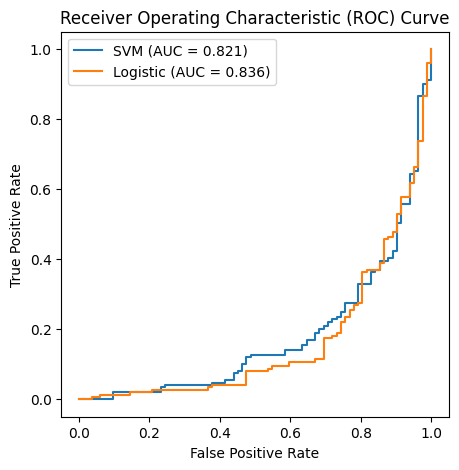

In [71]:
from sklearn.metrics import roc_curve, auc

svm_tpr, svm_fpr, threshold = roc_curve(y_test,y_pred_svm)
auc_svm = auc(svm_tpr,svm_fpr)

logistic_tpr, logistic_fpr, threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_tpr, logistic_fpr)

plt.figure(figsize=(5,5))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (AUC = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()